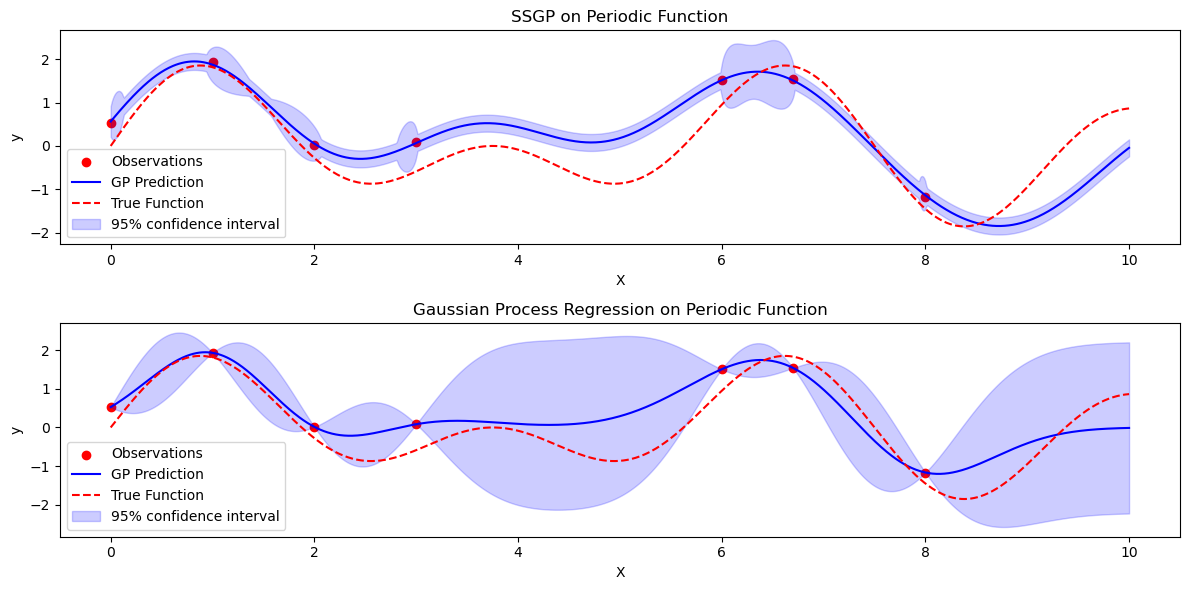

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from ssgp import SSGP

T_1 = 3
T_2 = 5

np.random.seed(0)
X1 = np.linspace(0, 3, 30).reshape(-1, 1)  # First range: 0 to 3
X2 = np.linspace(8, 20, 50).reshape(-1, 1)  # Second range: 8 to 20
# X = np.vstack((X1, X2))  # Combine the two ranges
X = np.array([0., 1, 2., 3., 6., 6.7, 8 ]).reshape(-1, 1)
y = (np.sin(2*np.pi*X/T_1) + np.sin(2*np.pi*X/T_2)).ravel() + np.random.normal(0, 0.3, X.shape[0]) 
X_new = np.linspace(0, 10, 1000).reshape(-1, 1)
Y_true = (np.sin(2*np.pi*X_new/T_1) + np.sin(2*np.pi*X_new/T_2)).ravel()
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))


gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)
y_pred_gp, sigma_gp = gp.predict(X_new, return_std=True)

ssgp = SSGP(n_features=100, length_scale=1.0, period=1.0, sigma_f=1.0, sigma_n=0.1, kernel="RBF")
ssgp.fit(X, y)
y_pred_ssgp, sigma_ssgp = ssgp.predict(X_new)


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(X, y, c='r', label='Observations')
plt.plot(X_new, y_pred_ssgp, 'b-', label='GP Prediction')
plt.plot(X_new, Y_true, 'r--', label='True Function')
plt.fill_between(X_new.ravel(), y_pred_ssgp - 1.96 * sigma_ssgp, y_pred_ssgp + 1.96 * sigma_ssgp, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SSGP on Periodic Function')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X, y, c='r', label='Observations')
plt.plot(X_new, y_pred_gp, 'b-', label='GP Prediction')
plt.plot(X_new, Y_true, 'r--', label='True Function')
plt.fill_between(X_new.ravel(), y_pred_gp - 1.96 * sigma_gp, y_pred_gp + 1.96 * sigma_gp, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression on Periodic Function')
plt.legend()

plt.tight_layout()
plt.show()

### Linear Function 

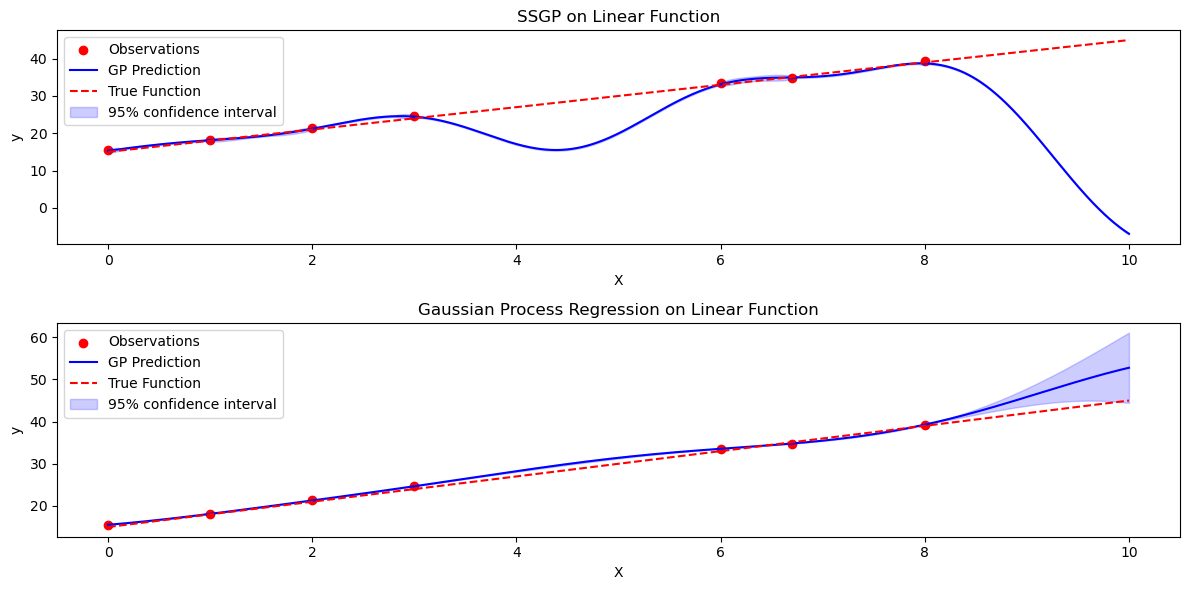

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from ssgp import SSGP

np.random.seed(0)
X1 = np.linspace(0, 3, 30).reshape(-1, 1)  # First range: 0 to 3
X2 = np.linspace(8, 20, 50).reshape(-1, 1)  # Second range: 8 to 20
# X = np.vstack((X1, X2))  # Combine the two ranges
X = np.array([0., 1, 2., 3., 6., 6.7, 8 ]).reshape(-1, 1)
y = 3 * (X + 5).ravel() + np.random.normal(0, 0.3, X.shape[0])  
X_new = np.linspace(0, 10, 1000).reshape(-1, 1)
Y_true = 3 * (X_new + 5).ravel() 
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))


gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)
y_pred_gp, sigma_gp = gp.predict(X_new, return_std=True)

ssgp = SSGP(n_features=100, length_scale=1.0, period=1.0, sigma_f=1.0, sigma_n=0.1, kernel="RBF")
ssgp.fit(X, y)
y_pred_ssgp, sigma_ssgp = ssgp.predict(X_new)


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(X, y, c='r', label='Observations')
plt.plot(X_new, y_pred_ssgp, 'b-', label='GP Prediction')
plt.plot(X_new, Y_true, 'r--', label='True Function')
plt.fill_between(X_new.ravel(), y_pred_ssgp - 1.96 * sigma_ssgp, y_pred_ssgp + 1.96 * sigma_ssgp, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SSGP on Linear Function')
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(X, y, c='r', label='Observations')
plt.plot(X_new, y_pred_gp, 'b-', label='GP Prediction')
plt.plot(X_new, Y_true, 'r--', label='True Function')
plt.fill_between(X_new.ravel(), y_pred_gp - 1.96 * sigma_gp, y_pred_gp + 1.96 * sigma_gp, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression on Linear Function')
plt.legend()

plt.tight_layout()
plt.show()